In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform,binom,norm,chi2_contingency

In [ ]:
df=pd.read_csv('walmart_data.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Data types of the variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


# Shape of the dataset

In [ ]:
df.shape
print(f'Number of columns: {df.shape[1]}')
print(f'Number of rows: {df.shape[0]}')

Number of columns: 10
Number of rows: 550068


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
df['Product_Category'].nunique()

20

In [ ]:
df['Stay_In_Current_City_Years'].nunique()

5

# Detecting the outliers for numerical variables

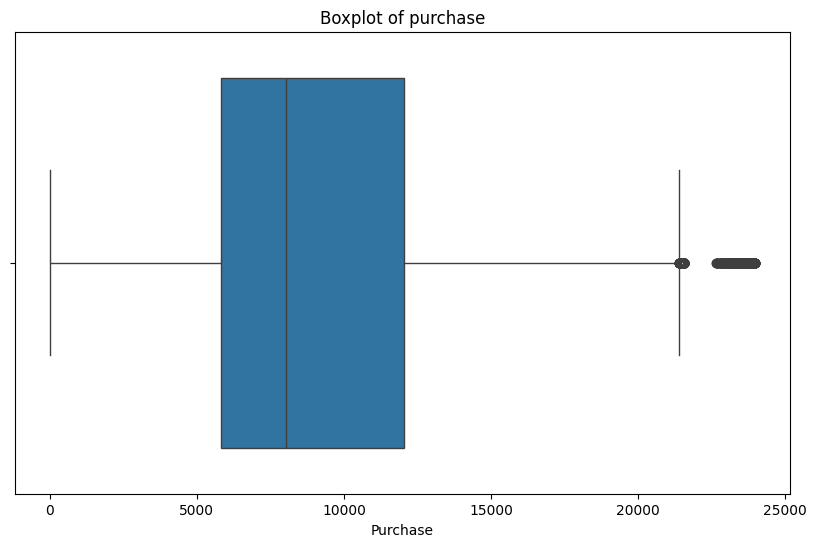

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Purchase')
plt.title('Boxplot of purchase')
plt.show()

In [ ]:
Q1=np.quantile(df['Purchase'],q=0.25)
Q3=np.quantile(df['Purchase'],q=0.75)
print(f'Quanile 1: {Q1}')
print(f'Quanile 3: {Q3}')


Quanile 1: 5823.0
Quanile 3: 12054.0


In [ ]:
IQR=Q3-Q1
min_thresold=max(Q1-1.5*IQR,np.min(df['Purchase']))
print(min_thresold)

12


In [ ]:
max_thresold=min(Q3+1.5*IQR,np.max(df['Purchase']))
print(max_thresold)

21400.5


#Removing the outliers

In [ ]:
df_outliers=df[(df['Purchase']>max_thresold) |( df['Purchase']<min_thresold)]
df_outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [ ]:
df_cleaned=df[(df['Purchase']<=max_thresold) & ( df['Purchase']>=min_thresold)]

In [ ]:
df_cleaned.shape

(547391, 10)

In [ ]:
fifth_percentile=np.percentile(df['Purchase'],q=5)
ninty_5_percentile=np.percentile(df['Purchase'],q=95)

print(fifth_percentile,ninty_5_percentile)

1984.0 19336.0


In [ ]:
df['Purchase_clipped']=np.clip(df['Purchase'],fifth_percentile,ninty_5_percentile)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Purchase_clipped
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,1984
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,1984
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137,1984
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,1984


# Data Exploration

In [ ]:
# Filter relevant columns
data_subset = df[['Age', 'Product_Category','Product_ID']]

# Group by Age and ProductCategory, count occurrences of each Product_ID
grouped_data = data_subset.groupby(['Age', 'Product_Category'])['Product_ID'].count().reset_index()
grouped_data

,Age,Product_Category,Product_ID
0,0-17,1,3585
1,0-17,2,805
2,0-17,3,1200
3,0-17,4,758
4,0-17,5,4330
...,...,...,...
135,55+,16,377
136,55+,17,67
137,55+,18,241
138,55+,19,103


<Axes: xlabel='Age', ylabel='Product_Category'>

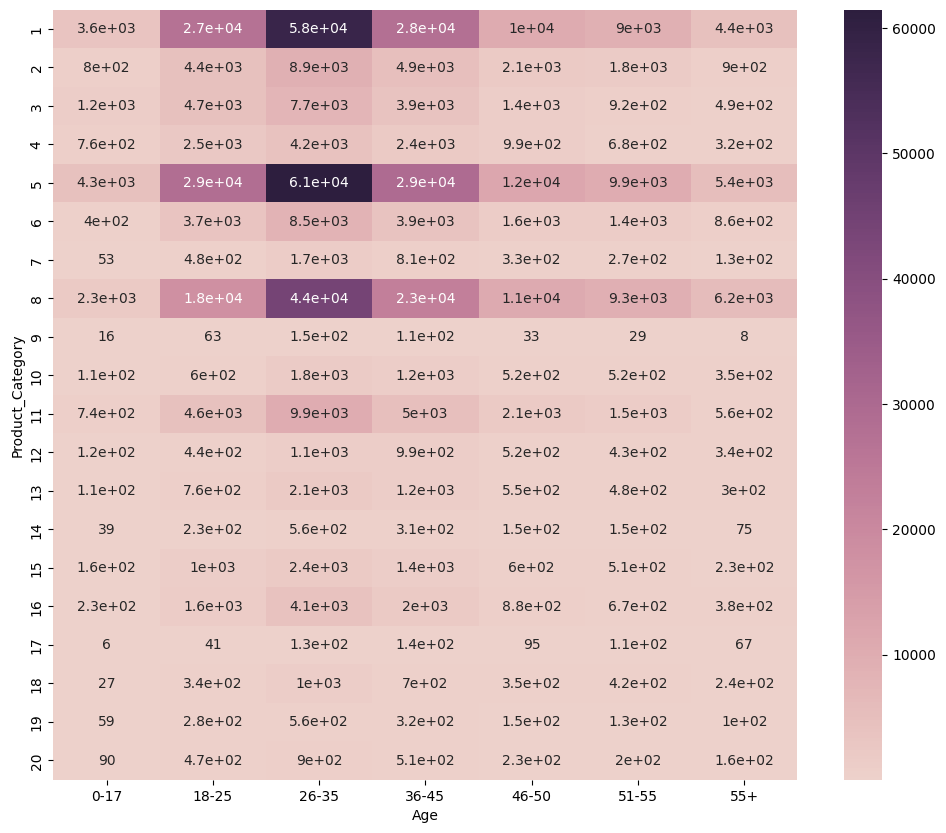

In [ ]:
Contingency_tab=pd.crosstab(columns=df['Age'],index=df['Product_Category'])
plt.figure(figsize=(12,10))
sns.heatmap(Contingency_tab,cmap=sns.cubehelix_palette(as_cmap=True),annot=True)



1.   For all age group the most purchased product categories are 5,1 and 8.
2.   For age group 26-35 and 36-45 there are few more significant product categories: 2,3,6 & 11.



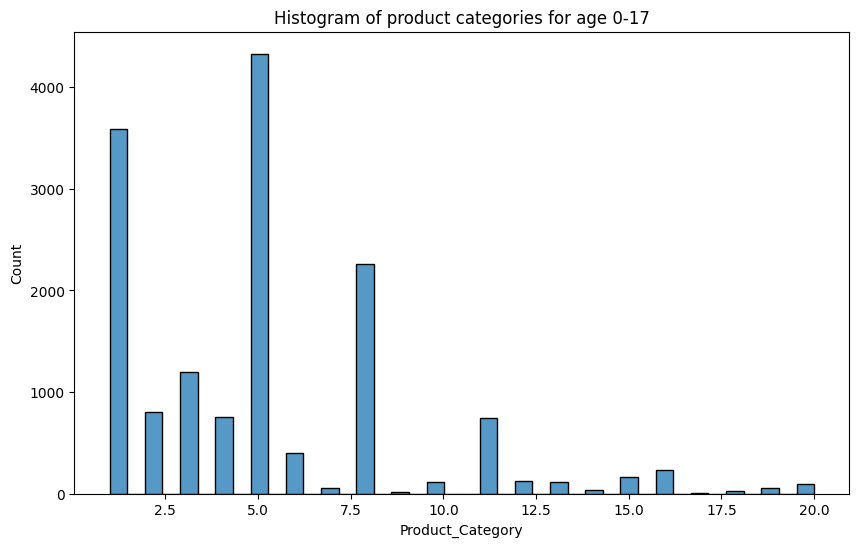

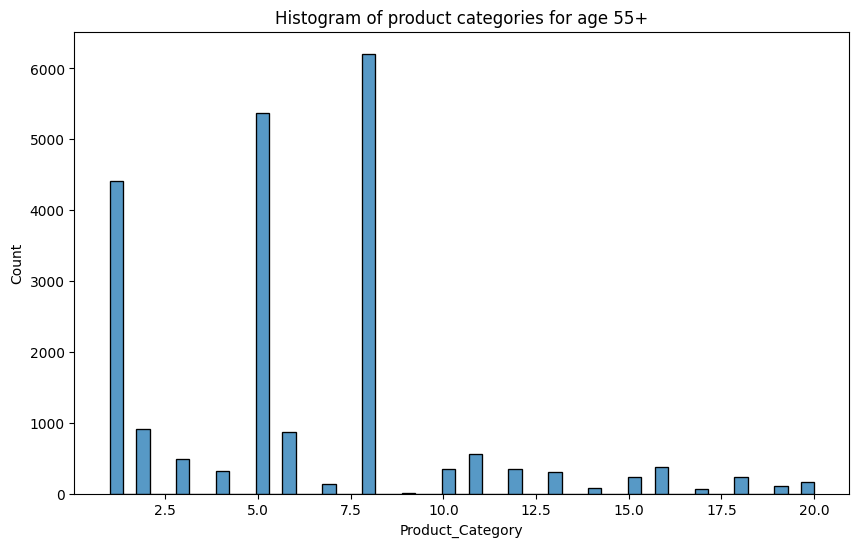

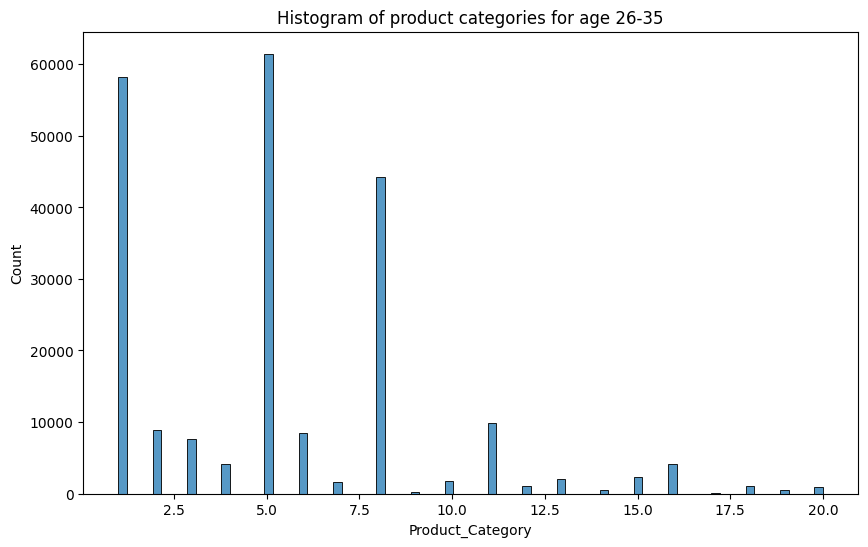

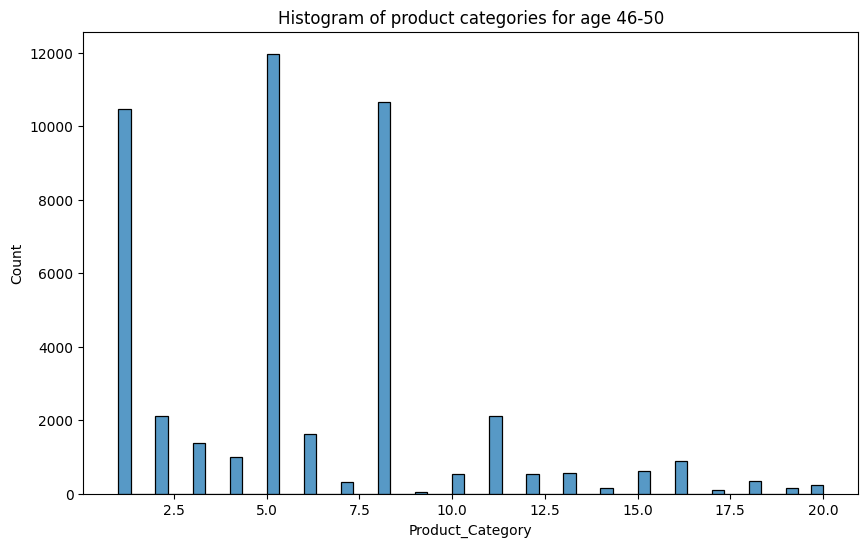

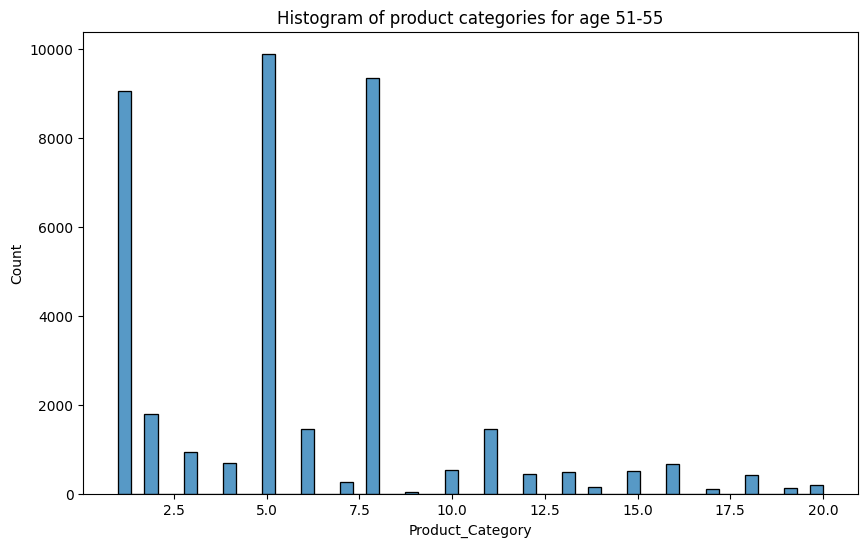

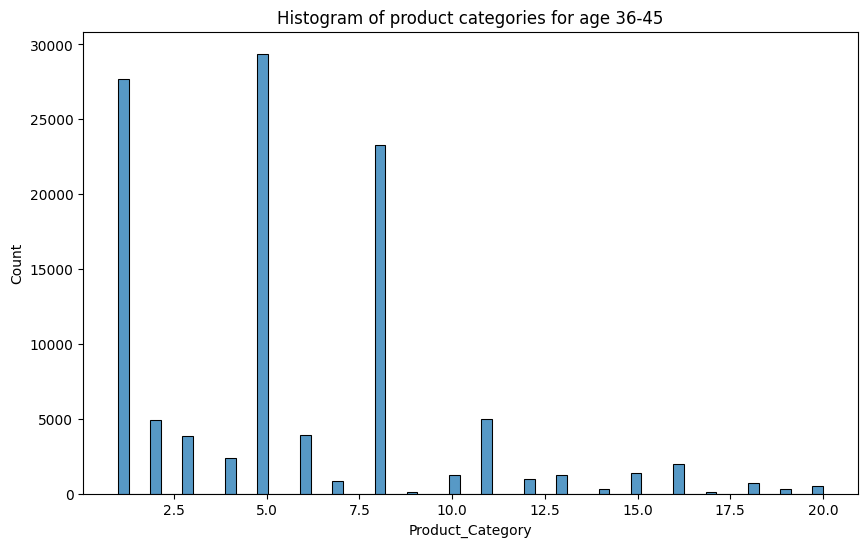

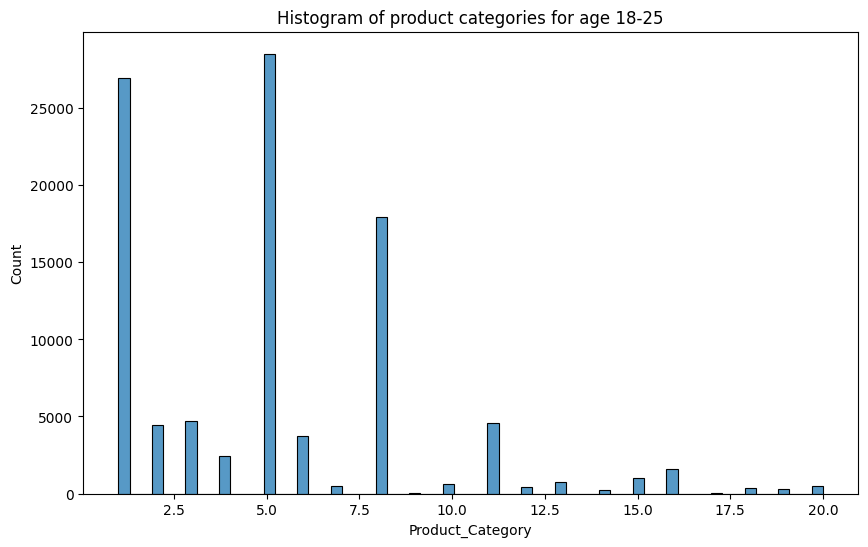

In [ ]:
for i in df['Age'].unique():
  plt.figure(figsize=(10,6))
  sns.histplot(data=df[df['Age']==i],x='Product_Category')
  plt.title(f'Histogram of product categories for age {i}')
plt.show()

# Chi Squared test of Independence

*   H0: Product Categories and Age group are independent of each other.
*   H1: They are not independent.



In [ ]:
chi2_contingency(pd.crosstab(df['Product_Category'],df['Age']))

Chi2ContingencyResult(statistic=7637.286550357664, pvalue=0.0, dof=114, expected_freq=array([[3.85404815e+03, 2.54333491e+04, 5.60388604e+04, 2.80754469e+04,
        1.16629489e+04, 9.82550044e+03, 5.48784607e+03],
       [6.55181047e+02, 4.32362224e+03, 9.52650248e+03, 4.77277397e+03,
        1.98267971e+03, 1.67031688e+03, 9.32923668e+02],
       [5.54943618e+02, 3.66214283e+03, 8.06902425e+03, 4.04257795e+03,
        1.67934567e+03, 1.41477183e+03, 7.90193852e+02],
       [3.22676116e+02, 2.12938033e+03, 4.69179449e+03, 2.35058718e+03,
        9.76468097e+02, 8.22629662e+02, 4.59464124e+02],
       [4.14383343e+03, 2.73456787e+04, 6.02524136e+04, 3.01864354e+04,
        1.25398842e+04, 1.05642783e+04, 5.90047636e+03],
       [5.61889679e+02, 3.70798076e+03, 8.17002178e+03, 4.09317768e+03,
        1.70036553e+03, 1.43248010e+03, 8.00084470e+02],
       [1.02159264e+02, 6.74161849e+02, 1.48542222e+03, 7.44195941e+02,
        3.09149816e+02, 2.60444565e+02, 1.45466350e+02],
       [3.1

# Preferred product categories for different genders

Text(0.5, 1.0, 'Histogram of product categories for different gender')

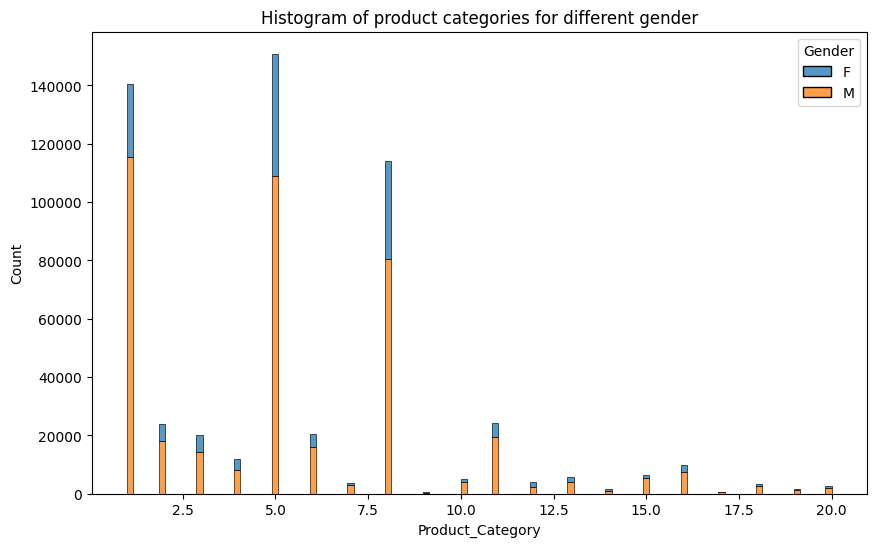

In [ ]:
  plt.figure(figsize=(10,6))
  sns.histplot(data=df,x='Product_Category',hue='Gender',multiple='stack')
  plt.title('Histogram of product categories for different gender')

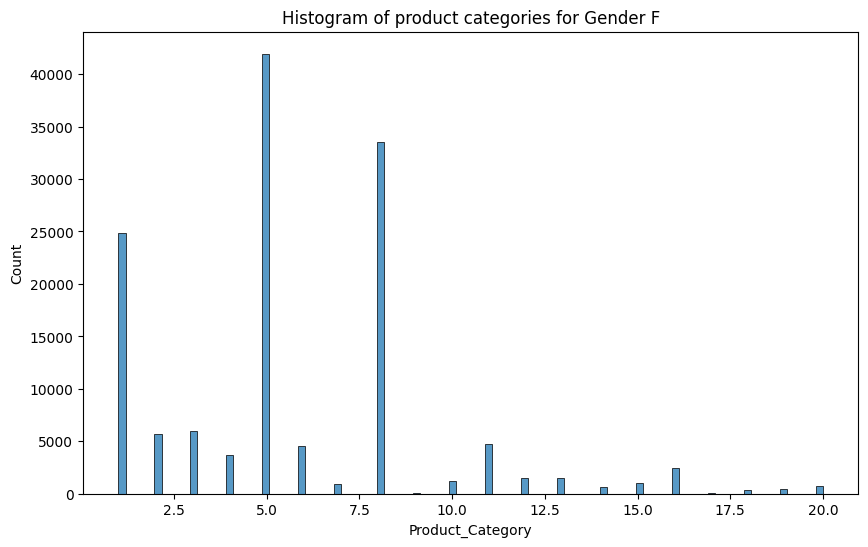

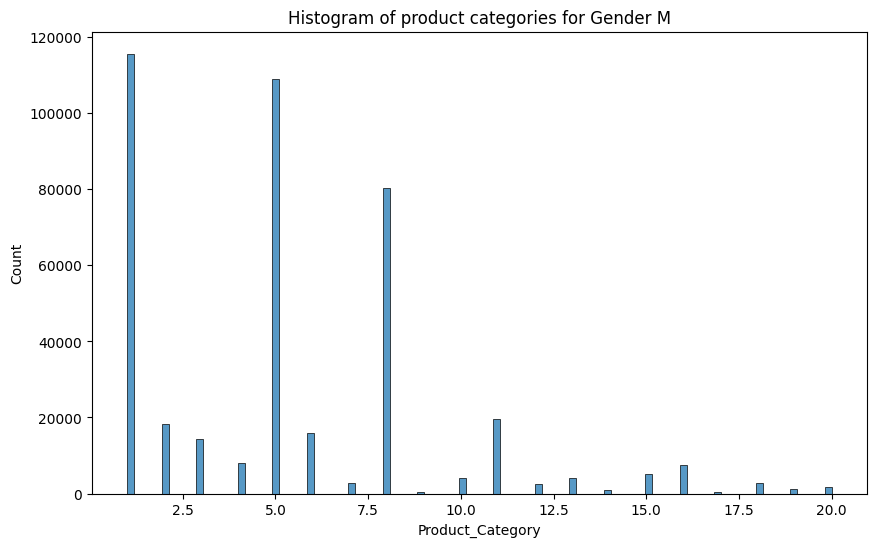

In [ ]:
for i in df['Gender'].unique():
  plt.figure(figsize=(10,6))
  sns.histplot(data=df[df['Gender']==i],x='Product_Category')
  plt.title(f'Histogram of product categories for Gender {i}')
plt.show()

# Chi Squared test of Independence



*   H0: Product Categories and Gender are independent of each other.
*   H1: They are not independent.



In [ ]:
chi2_contingency(pd.crosstab(df['Product_Category'],df['Gender']))

Chi2ContingencyResult(statistic=8070.411022236562, pvalue=0.0, dof=19, expected_freq=array([[3.46586164e+04, 1.05719384e+05],
       [5.89190059e+03, 1.79720994e+04],
       [4.99048721e+03, 1.52225128e+04],
       [2.90175610e+03, 8.85124390e+03],
       [3.72645924e+04, 1.13668408e+05],
       [5.05295162e+03, 1.54130484e+04],
       [9.18696032e+02, 2.80230397e+03],
       [2.81275048e+04, 8.57974952e+04],
       [1.01226921e+02, 3.08773079e+02],
       [1.26533651e+03, 3.85966349e+03],
       [5.99633715e+03, 1.82906629e+04],
       [9.74494286e+02, 2.97250571e+03],
       [1.37001996e+03, 4.17898004e+03],
       [3.76020977e+02, 1.14697902e+03],
       [1.55296911e+03, 4.73703089e+03],
       [2.42648337e+03, 7.40151663e+03],
       [1.42705269e+02, 4.35294731e+02],
       [7.71546654e+02, 2.35345335e+03],
       [3.95772572e+02, 1.20722743e+03],
       [6.29582070e+02, 1.92041793e+03]]))



*   Result: We can say that Product category and gender are statistically associated.




# Is there a relationship between age, marital status, and the amount spent?

To test: Age and marital status is impacting amount purchased or not?

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
test=ols('Purchase_clipped ~ C(Age)*C(Marital_Status)',data=df).fit()
sm.stats.anova_lm(test,typ=2)

,sum_sq,df,F,PR(>F)
C(Age),5.594562e+09,6.0,3.956905e+01,2.051804e-48
C(Marital_Status),-2.248602e-04,1.0,-9.542304e-12,1.000000e+00
C(Age):C(Marital_Status),3.306243e+09,6.0,2.338429e+01,8.711628e-28
Residual,1.296180e+13,550055.0,NaN,NaN


# Inferences: (assume alpha=0.05)

1.   The avg purchase amount across various Age groups are different.
2.   The avg purchase amount across various Marital status is same.


3. Interaction effect:  The avg purchase amount across various Age and marital status groups are different.






# Analysis of correlation between diff. variables

<ipython-input-29-b8389f12d4e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df.corr()


<Axes: >

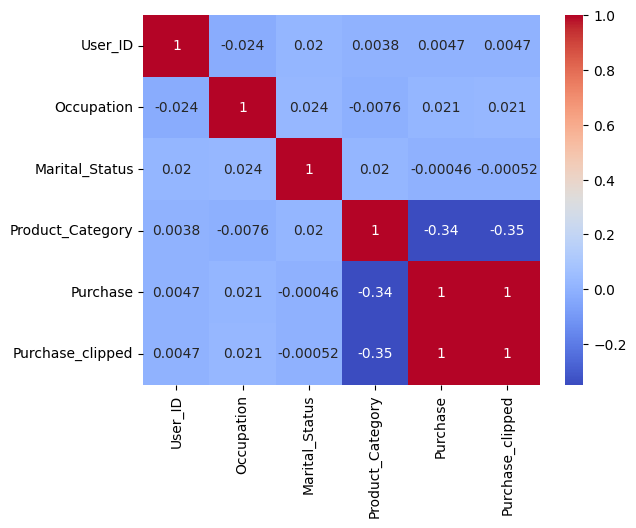

In [ ]:
corr_mat=df.corr()
sns.heatmap(corr_mat,cmap='coolwarm',annot=True)

# How does gender affect the amount spent?

In [ ]:
male_amt_purchase=df[df['Gender']=='M']['Purchase_clipped']
female_amt_purchase=df[df['Gender']=='F']['Purchase_clipped']


In [ ]:
male_amt_purchase.mean()


9427.240996574606

In [ ]:
female_amt_purchase.mean()

8736.540266109021

# Testing the hypothesis
H0: Avg. purchase amount of males and females are same.




H1: Avg. purchase amount of males are significantly higher than females.

In [ ]:
from statsmodels.stats import weightstats as stests
stests.ztest(male_amt_purchase,female_amt_purchase,alternative='larger')


(45.574933432542736, 0.0)


*   Conclusion: Average pucrchase amt. of males are actually greater than
that of females.

# Computing the Confidence Intervals

# Sample size: 300 [Age vs Gender]

In [ ]:
bootstrapped_sample_male_means=np.array([np.random.choice(male_amt_purchase,size=300).mean() for i in range (1000)])


In [ ]:
bootstrapped_sample_female_means=np.array([np.random.choice(female_amt_purchase,size=300).mean()for i in range(1000)])


In [ ]:
bootstraped_sample_diff=bootstrapped_sample_male_means-bootstrapped_sample_female_means

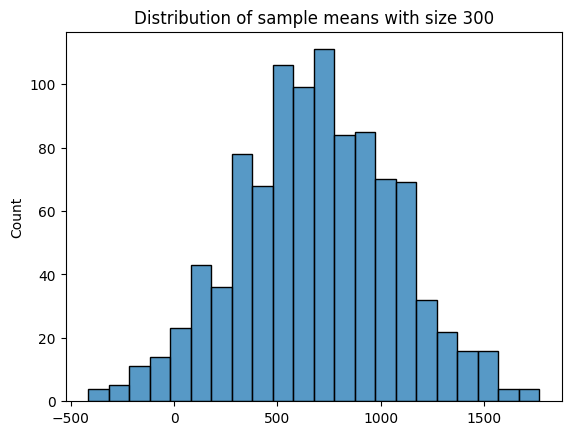

In [ ]:
sns.histplot(bootstraped_sample_diff)
plt.title('Distribution of sample means with size 300')
plt.show()

In [ ]:
alpha=0.05
lower_percentile=(alpha/2)
upper_percentile=1-lower_percentile

In [ ]:
lower_bound=np.percentile(bootstraped_sample_diff,lower_percentile*100)
upper_bound=np.percentile(bootstraped_sample_diff,upper_percentile*100)

In [ ]:
print(f'Confidence interval for Sample size 300: [{lower_bound},{upper_bound}]')

Confidence interval for Sample size 300: [-72.59374999999962,1462.3171666666672]


#Sample size 3000

Text(0.5, 1.0, 'Distribution of sample means with size 3000')

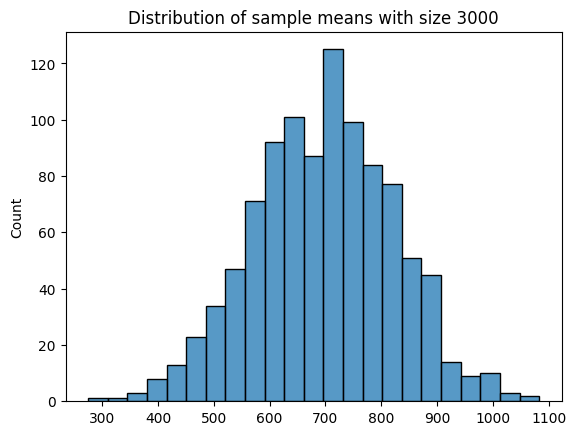

In [ ]:
bootstrapped_sample_male_means=np.array([np.random.choice(male_amt_purchase,size=3000).mean() for i in range (1000)])
bootstrapped_sample_female_means=np.array([np.random.choice(female_amt_purchase,size=3000).mean()for i in range(1000)])
bootstraped_sample_diff=bootstrapped_sample_male_means-bootstrapped_sample_female_means
sns.histplot(bootstraped_sample_diff)
plt.title('Distribution of sample means with size 3000')


In [ ]:
lower_bound=np.percentile(bootstraped_sample_diff,lower_percentile*100)
upper_bound=np.percentile(bootstraped_sample_diff,upper_percentile*100)

In [ ]:
print(f'Confidence interval for Sample size 3000: [{lower_bound},{upper_bound}]')

Confidence interval for Sample size 3000: [448.0311916666676,941.6341583333343]


# Sample size 30000

Text(0.5, 1.0, 'Distribution of sample means with size 30000')

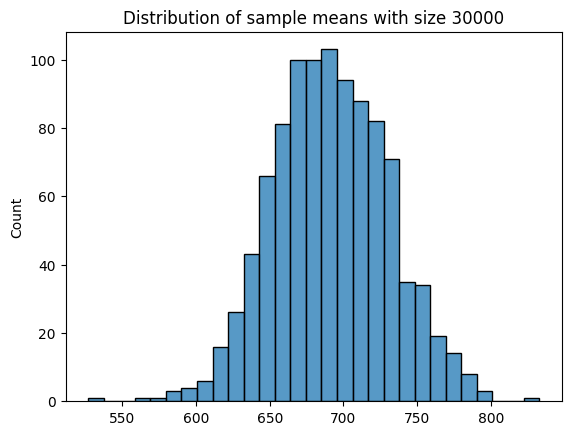

In [ ]:
bootstrapped_sample_male_means=np.array([np.random.choice(male_amt_purchase,size=30000).mean() for i in range (1000)])
bootstrapped_sample_female_means=np.array([np.random.choice(female_amt_purchase,size=30000).mean()for i in range(1000)])
bootstraped_sample_diff=bootstrapped_sample_male_means-bootstrapped_sample_female_means
sns.histplot(bootstraped_sample_diff)
plt.title('Distribution of sample means with size 30000')


In [ ]:
lower_bound=np.percentile(bootstraped_sample_diff,lower_percentile*100)
upper_bound=np.percentile(bootstraped_sample_diff,upper_percentile*100)

In [ ]:
print(f'Confidence interval for Sample size 30000: [{lower_bound},{upper_bound}]')

Confidence interval for Sample size 30000: [618.0717891666669,769.922654166667]


#Sampling for the whole population

Text(0.5, 1.0, 'Distribution of sample means with size of population')

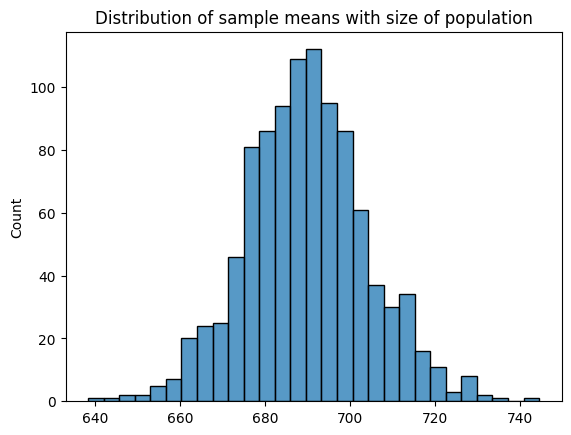

In [ ]:
bootstrapped_sample_male_means=np.array([np.random.choice(male_amt_purchase,size=male_amt_purchase.shape[0]).mean() for i in range (1000)])
bootstrapped_sample_female_means=np.array([np.random.choice(female_amt_purchase,size=female_amt_purchase.shape[0]).mean()for i in range(1000)])
bootstraped_sample_diff=bootstrapped_sample_male_means-bootstrapped_sample_female_means
sns.histplot(bootstraped_sample_diff)
plt.title('Distribution of sample means with size of population')

In [ ]:
lower_bound=np.percentile(bootstraped_sample_diff,lower_percentile*100)
upper_bound=np.percentile(bootstraped_sample_diff,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the whole data: [{lower_bound},{upper_bound}]')

Confidence interval for the whole data: [661.8366569732918,719.5685991898481]


In [ ]:
lower_bound_male=np.percentile(bootstrapped_sample_male_means,lower_percentile*100)
upper_bound_male=np.percentile(bootstrapped_sample_male_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the whole male data: [{lower_bound_male},{upper_bound_male}] and the spread is {upper_bound_male-lower_bound_male}' )

Confidence interval for the whole male data: [9411.89106482901,9441.422151419765] and the spread is 29.531086590755876


In [ ]:
lower_bound_female=np.percentile(bootstrapped_sample_female_means,lower_percentile*100)
upper_bound_female=np.percentile(bootstrapped_sample_female_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the whole female data: [{lower_bound_female},{upper_bound_female}] and the spread is {upper_bound_female-lower_bound_female}' )

Confidence interval for the whole female data: [8712.6944232341,8760.608727330295] and the spread is 47.91430409619534


# Findings

*  The confidence interval computed using the entire dataset wider for females compared to males. It's because the variation or the std. deviation in the purchase amount of female is higher.


*   Width of the cofidence interval decreases as sample size increases, which is consistent with CLT.
*   Confidence Interval with higher sample sizes will lie within the confidence Interval with smaller sample sizes.

*   As sample size increases the sampling distribution of sample means become more normally disributed with lesser spread and higher precision.










# How does Marital_Status affect the amount spent?

In [ ]:
married_amt_purchase=df[df['Marital_Status']==1]['Purchase_clipped']
bachelor_amt_purchase=df[df['Marital_Status']==0]['Purchase_clipped']

In [ ]:
married_amt_purchase.mean()

9253.669823420034

In [ ]:
bachelor_amt_purchase.mean()

9258.820463706883

# Testing the hypothesis
H0: Avg. purchase amount of married and bachelors are same.




H1: Avg. purchase amount of married and bachelor are significantly different.

In [ ]:
from statsmodels.stats import weightstats as stests
stests.ztest(married_amt_purchase,bachelor_amt_purchase)

(-0.3868627106847199, 0.6988578483633914)

We fail to reject the null hypothesis , that means Avg. purchase amount of married and bachelor are same

# Sample with size 300

Text(0.5, 1.0, 'Distribution of sample married means with size 300')

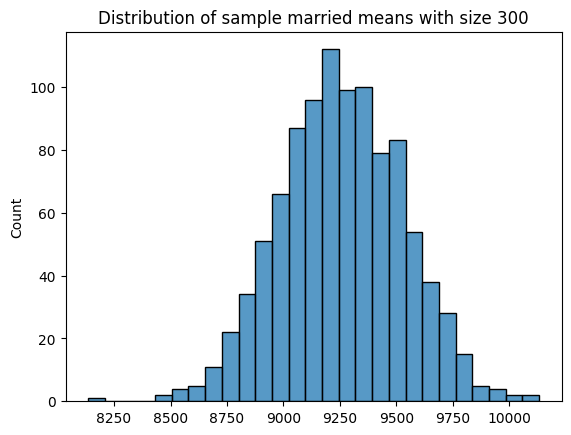

In [ ]:
bootstrapped_sample_married_means=np.array([np.random.choice(married_amt_purchase,size=300).mean() for i in range (1000)])
bootstrapped_sample_bachelor_means=np.array([np.random.choice(bachelor_amt_purchase,size=300).mean()for i in range(1000)])

sns.histplot(bootstrapped_sample_married_means)
plt.title('Distribution of sample married means with size 300')

Text(0.5, 1.0, 'Distribution of sample bachelor means with size 300')

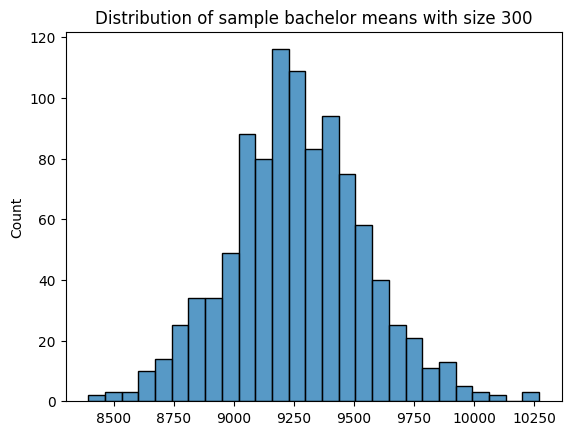

In [ ]:
sns.histplot(bootstrapped_sample_bachelor_means)
plt.title('Distribution of sample bachelor means with size 300')

In [ ]:
lower_bound_married=np.percentile(bootstrapped_sample_married_means,lower_percentile*100)
upper_bound_married=np.percentile(bootstrapped_sample_married_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the 300 sample sized married data: [{lower_bound_married},{upper_bound_married}] and the spread is {upper_bound_married-lower_bound_married}' )

Confidence interval for the 300 sample sized married data: [8740.2085,9793.45625] and the spread is 1053.2477499999986


In [ ]:
lower_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,lower_percentile*100)
upper_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the 300 sample sized bachelor data: [{lower_bound_bachelor},{upper_bound_bachelor}] and the spread is {upper_bound_bachelor-lower_bound_bachelor}' )

Confidence interval for the 300 sample sized bachelor data: [8723.326000000001,9855.276] and the spread is 1131.949999999999


# Sample size with size 3000

Text(0.5, 1.0, 'Distribution of sample married means with size 3000')

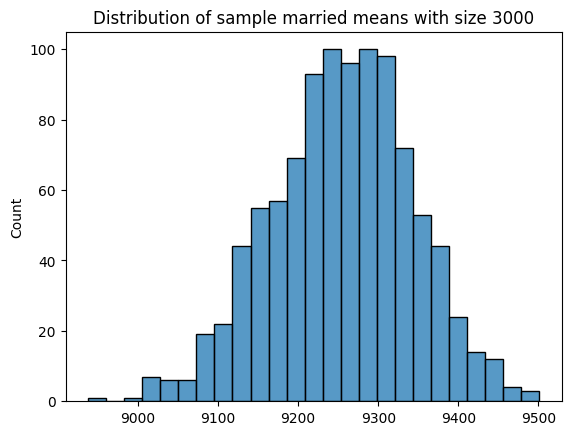

In [ ]:
bootstrapped_sample_married_means=np.array([np.random.choice(married_amt_purchase,size=3000).mean() for i in range (1000)])
bootstrapped_sample_bachelor_means=np.array([np.random.choice(bachelor_amt_purchase,size=3000).mean()for i in range(1000)])

sns.histplot(bootstrapped_sample_married_means)
plt.title('Distribution of sample married means with size 3000')

Text(0.5, 1.0, 'Distribution of sample bachelor means with size 3000')

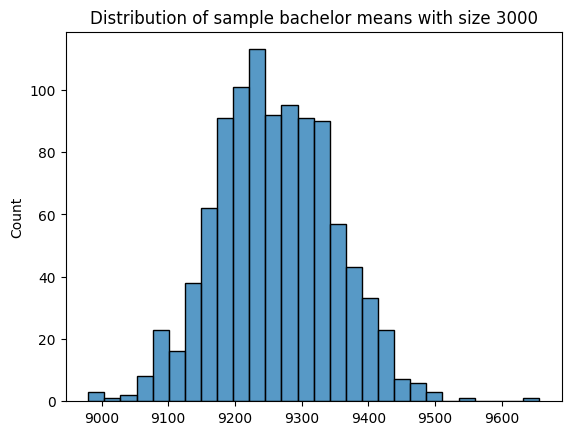

In [ ]:
sns.histplot(bootstrapped_sample_bachelor_means)
plt.title('Distribution of sample bachelor means with size 3000')

In [ ]:
lower_bound_married=np.percentile(bootstrapped_sample_married_means,lower_percentile*100)
upper_bound_married=np.percentile(bootstrapped_sample_married_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the 3000 sample sized married data: [{lower_bound_married},{upper_bound_married}] and the spread is {upper_bound_married-lower_bound_married}' )

Confidence interval for the 3000 sample sized married data: [9080.305100000001,9417.7054] and the spread is 337.40029999999933


In [ ]:
lower_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,lower_percentile*100)
upper_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the 3000 sample sized bachelor data: [{lower_bound_bachelor},{upper_bound_bachelor}] and the spread is {upper_bound_bachelor-lower_bound_bachelor}' )

Confidence interval for the 3000 sample sized bachelor data: [9087.211749999999,9432.521591666666] and the spread is 345.3098416666671


# Sample with size 30000

Text(0.5, 1.0, 'Distribution of sample married means with size 30000')

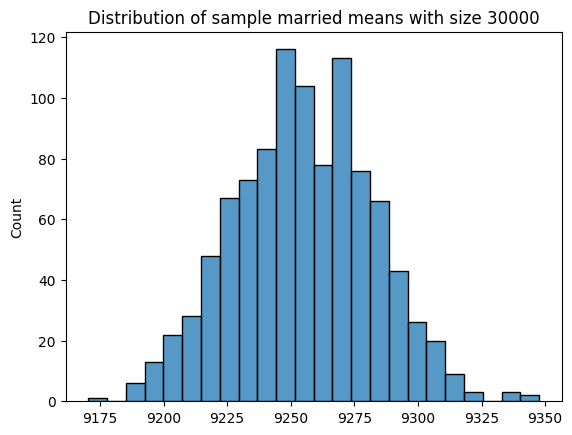

In [ ]:
bootstrapped_sample_married_means=np.array([np.random.choice(married_amt_purchase,size=30000).mean() for i in range (1000)])
bootstrapped_sample_bachelor_means=np.array([np.random.choice(bachelor_amt_purchase,size=30000).mean()for i in range(1000)])

sns.histplot(bootstrapped_sample_married_means)
plt.title('Distribution of sample married means with size 30000')

Text(0.5, 1.0, 'Distribution of sample bachelor means with size 30000')

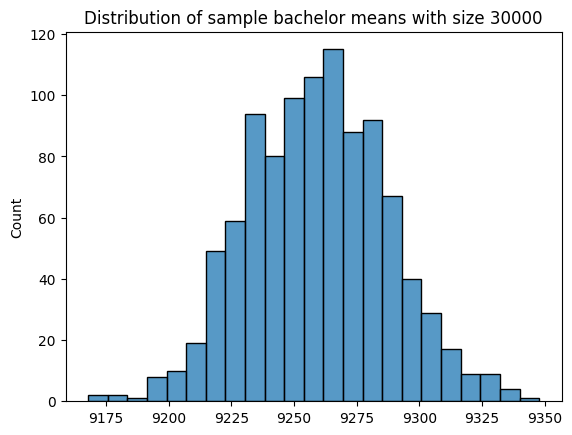

In [ ]:
sns.histplot(bootstrapped_sample_bachelor_means)
plt.title('Distribution of sample bachelor means with size 30000')

In [ ]:
lower_bound_married=np.percentile(bootstrapped_sample_married_means,lower_percentile*100)
upper_bound_married=np.percentile(bootstrapped_sample_married_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the 30000 sample sized married data: [{lower_bound_married},{upper_bound_married}] and the spread is {upper_bound_married-lower_bound_married}' )

Confidence interval for the 30000 sample sized married data: [9202.6803,9306.213634166666] and the spread is 103.53333416666646


In [ ]:
lower_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,lower_percentile*100)
upper_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,upper_percentile*100)

In [ ]:
print(f'Confidence interval for the 30000 sample sized bachelor data: [{lower_bound_bachelor},{upper_bound_bachelor}] and the spread is {upper_bound_bachelor-lower_bound_bachelor}' )

Confidence interval for the 30000 sample sized bachelor data: [9207.615945000001,9315.215626666666] and the spread is 107.59968166666476


# Sample with whole data

Text(0.5, 1.0, 'Distribution of sample married means with all data')

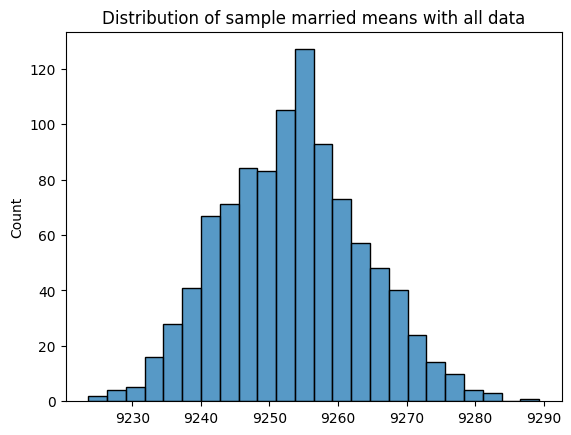

In [ ]:
bootstrapped_sample_married_means=np.array([np.random.choice(married_amt_purchase,size=married_amt_purchase.shape[0]).mean() for i in range (1000)])
bootstrapped_sample_bachelor_means=np.array([np.random.choice(bachelor_amt_purchase,size=bachelor_amt_purchase.shape[0]).mean()for i in range(1000)])

sns.histplot(bootstrapped_sample_married_means)
plt.title('Distribution of sample married means with all data')

Text(0.5, 1.0, 'Distribution of sample bachelor means with whole data')

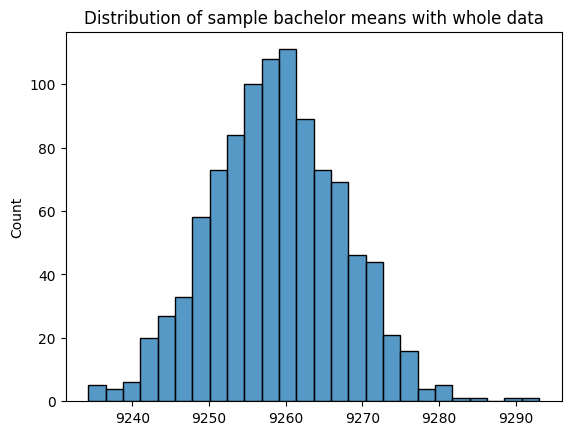

In [ ]:
sns.histplot(bootstrapped_sample_bachelor_means)
plt.title('Distribution of sample bachelor means with whole data')

In [ ]:
lower_bound_married=np.percentile(bootstrapped_sample_married_means,lower_percentile*100)
upper_bound_married=np.percentile(bootstrapped_sample_married_means,upper_percentile*100)
print(f'Confidence interval for the whole sample sized married data: [{lower_bound_married},{upper_bound_married}] and the spread is {upper_bound_married-lower_bound_married}' )

Confidence interval for the whole sample sized married data: [9234.516213715457,9274.031671784927] and the spread is 39.5154580694707


In [ ]:
lower_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,lower_percentile*100)
upper_bound_bachelor=np.percentile(bootstrapped_sample_bachelor_means,upper_percentile*100)
print(f'Confidence interval for the whole sample sized bachelor data: [{lower_bound_bachelor},{upper_bound_bachelor}] and the spread is {upper_bound_bachelor-lower_bound_bachelor}' )

Confidence interval for the whole sample sized bachelor data: [9241.917071129643,9275.21197013836] and the spread is 33.29489900871704




*   So the CI of married and bachelors are almost overlapping with each other, hence the avg purchase amt between married and bachelor is same.



# Findings

*  The confidence interval computed using the entire dataset wider for married compared to bachelors. It's because the variation or the std. deviation in the purchase amount of married group is higher.


*   Width of the cofidence interval decreases as sample size increases, which is consistent with CLT.
*   Confidence Interval with higher sample sizes will lie within the confidence Interval with smaller sample sizes.

*   As sample size increases the sampling distribution of sample means become more normally disributed with lesser spread and higher precision.

# How does Age affect the amount spent?

H0: Age has no effect on the amount spent.


H1: At least one of the age group has different amount spent.

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
purchase_amt_child=df[df['Age']=='0-17']['Purchase_clipped']
purchase_amt_twenty=df[df['Age']=='18-25']['Purchase_clipped']
purchase_amt_thirty=df[df['Age']=='26-35']['Purchase_clipped']
purchase_amt_forty=df[df['Age']=='36-45']['Purchase_clipped']
purchase_amt_fifty=df[df['Age']=='46-50']['Purchase_clipped']
purchase_amt_fiftyplus=df[df['Age']=='51-55']['Purchase_clipped']
purchase_amt_old=df[df['Age']=='55+']['Purchase_clipped']

In [ ]:
from scipy.stats import f_oneway
f_oneway(purchase_amt_child,purchase_amt_twenty,purchase_amt_thirty,purchase_amt_forty,purchase_amt_fifty,purchase_amt_fiftyplus ,purchase_amt_old)

F_onewayResult(statistic=39.55938862241555, pvalue=2.111079894476655e-48)



*   So we can reject the null hypothesis, and tell that amount spent on purchase of different age groups is not same.




# Sample with size 300

In [ ]:
bootstrapped_sample_child_means=np.array([np.random.choice(purchase_amt_child,size=300).mean() for i in range (1000)])
bootstrapped_sample_twenty_means=np.array([np.random.choice(purchase_amt_twenty,size=300).mean()for i in range(1000)])
bootstrapped_sample_thirty_means=np.array([np.random.choice(purchase_amt_thirty,size=300).mean()for i in range(1000)])
bootstrapped_sample_forty_means=np.array([np.random.choice(purchase_amt_forty,size=300).mean()for i in range(1000)])
bootstrapped_sample_fifty_means=np.array([np.random.choice(purchase_amt_fifty,size=300).mean()for i in range(1000)])
bootstrapped_sample_fiftyplus_means=np.array([np.random.choice(purchase_amt_fiftyplus,size=300).mean()for i in range(1000)])
bootstrapped_sample_old_means=np.array([np.random.choice(purchase_amt_old,size=300).mean()for i in range(1000)])


# Confidence Intervals

In [ ]:
lower_bound_child=np.percentile(bootstrapped_sample_child_means,lower_percentile*100)
upper_bound_child=np.percentile(bootstrapped_sample_child_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 300 child data: [{lower_bound_child},{upper_bound_child}] and the spread is {upper_bound_child-lower_bound_child}' )

Confidence interval for the sample sized 300 child data: [8367.572083333333,9522.259416666666] and the spread is 1154.6873333333333


In [ ]:
lower_bound_twenty=np.percentile(bootstrapped_sample_twenty_means,lower_percentile*100)
upper_bound_twenty=np.percentile(bootstrapped_sample_twenty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 300 & Age(18-25) data: [{lower_bound_twenty},{upper_bound_twenty}] and the spread is {upper_bound_twenty-lower_bound_twenty}' )

Confidence interval for the sample sized 300 & Age(18-25) data: [8615.360333333332,9704.3605] and the spread is 1089.0001666666685


In [ ]:
lower_bound_thirty=np.percentile(bootstrapped_sample_thirty_means,lower_percentile*100)
upper_bound_thirty=np.percentile(bootstrapped_sample_thirty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 300 & Age(26-35) data: [{lower_bound_thirty},{upper_bound_thirty}] and the spread is {upper_bound_thirty-lower_bound_thirty}' )

Confidence interval for the sample sized 300 & Age(26-35) data: [8722.628833333332,9751.014833333333] and the spread is 1028.3860000000004


In [ ]:
lower_bound_forty=np.percentile(bootstrapped_sample_forty_means,lower_percentile*100)
upper_bound_forty=np.percentile(bootstrapped_sample_forty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 300 & Age(36-45) data: [{lower_bound_forty},{upper_bound_forty}] and the spread is {upper_bound_forty-lower_bound_forty}' )

Confidence interval for the sample sized 300 & Age(36-45) data: [8789.254833333334,9869.134916666666] and the spread is 1079.8800833333316


In [ ]:
lower_bound_fifty=np.percentile(bootstrapped_sample_fifty_means,lower_percentile*100)
upper_bound_fifty=np.percentile(bootstrapped_sample_fifty_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 300 & Age(46-50) data: [{lower_bound_fifty},{upper_bound_fifty}] and the spread is {upper_bound_fifty-lower_bound_fifty}' )

Confidence interval for the sample sized 300 & Age(46-50) data: [8653.463833333333,9774.1195] and the spread is 1120.6556666666675


In [ ]:
lower_bound_fiftyplus=np.percentile(bootstrapped_sample_fiftyplus_means,lower_percentile*100)
upper_bound_fiftyplus=np.percentile(bootstrapped_sample_fiftyplus_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 300 & Age(50-55) data: [{lower_bound_fiftyplus},{upper_bound_fiftyplus}] and the spread is {upper_bound_fiftyplus-lower_bound_fiftyplus}' )

Confidence interval for the sample sized 300 & Age(50-55) data: [9001.636583333335,10099.3225] and the spread is 1097.6859166666654


In [ ]:
lower_bound_old=np.percentile(bootstrapped_sample_old_means,lower_percentile*100)
upper_bound_old=np.percentile(bootstrapped_sample_old_means,upper_percentile*100)
print(f'Confidence interval for the sample sized 300 & Age(55+) data: [{lower_bound_old},{upper_bound_old}] and the spread is {upper_bound_old-lower_bound_old}' )

Confidence interval for the sample sized 300 & Age(55+) data: [8778.247416666667,9883.6235] and the spread is 1105.3760833333326


# Findings

*  The confidence interval computed using the entire dataset wider for married compared to bachelors. It's because the variation or the std. deviation in the purchase amount of married group is higher.


*   Width of the cofidence interval decreases as sample size increases, which is consistent with CLT.
*   Confidence Interval with higher sample sizes will lie within the confidence Interval with smaller sample sizes.

*   As sample size increases the sampling distribution of sample means become more normally disributed with lesser spread and higher precision.